## [산점도 그래프]
- 용도 : 2개 이상의 컬럼들의 관계 정도를 시각화하는 그래프
- corr()

(1) 모듈 로딩 <hr>

In [1]:
import pandas as pd
import numpy as np


In [2]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)], columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)


,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [3]:
df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)], columns=['dogs', 'cats'])
df


,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [4]:
df.corr(min_periods=2)


,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


(2) 데이터 준비 <hr>

In [5]:
file = '../DATA/auto-mpg.csv'


(3) 데이터 저장 => CSV ---> DataFrame <hr>

- 컬럼 데이터 정보
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [6]:
mpgDF = pd.read_csv(file, sep='\s+',
                    names=['mpg', 'cylinders', 'displacement', 'horsepower',
                           'weight', 'acceleration', 'model year', 'origin',
                           'car name'])


In [7]:
mpgDF.head(3)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


(4) 데이터 정보 확인 <hr>

In [8]:
mpgDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터 값의 종류 즉 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값으 종류 및 범위
    * 각 컬럼의 실제 데이터 타입

In [9]:
for col in mpgDF.columns:
    print(f'[{col}]===========')
    print(mpgDF[col].nunique(), mpgDF[col].unique(), sep='\n', end='\n\n')


[mpg]===========
129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[cylinders]===========
5
[8 4 6 3 5]

[displacement]===========
82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155

In [10]:
mpgDF['origin'].nunique(dropna=False), mpgDF['origin'].unique()


(3, array([1, 3, 2], dtype=int64))

(5) 데이터 전처리 <hr>
- 결측치 체크 => 꼭 NaN이 아닐 수 있음
- 중복값 체키
- 이상치 체크 => 정말 컬럼의 범위를 벗어난 값, 잘못 입력된 값
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

(5-1) 결측치 체크 및 처리 ==> 이상한 값

In [11]:
mpgDF.horsepower.value_counts()['?']


6

In [12]:
mpgDF['horsepower'].replace('?', np.nan, inplace=True)


In [13]:
mpgDF.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
mpgDF.dropna()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


(5-2) 데이터 표준화 => horsepower의 자료형을 실제 자료형과 일치

In [15]:
mpgDF.horsepower = mpgDF.horsepower.astype('float32')


In [16]:
mpgDF.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

(5-2) 데이터 표준화 => 연속형 즉 수치 자료형 -----> 범주형 자료형 변환
- 46 ~ 230 범위의 실수 수치값 ===> 저출력 / 중출력 / 고출력

In [17]:
mpgDF.horsepower.describe()


count    392.000000
mean     104.469391
std       38.491138
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [18]:
pd.cut(np.array([1, 7, 5, 4, 6 ,3]), 3, include_lowest=True)


[(0.993, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.993, 3.0]]
Categories (3, interval[float64, right]): [(0.993, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [19]:
pd.cut(np.array([1, 7, 5, 4, 6 ,3]), 3, labels=['신생아', '영아', '유아'])


['신생아', '유아', '영아', '영아', '유아', '신생아']
Categories (3, object): ['신생아' < '영아' < '유아']

In [20]:
out, ret = pd.cut(mpgDF.horsepower, bins=3, labels=['저마력', '중마력', '고마력'], retbins=True)
type(out), ret


(pandas.core.series.Series,
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [21]:
mpgDF['horsepower'] = out
mpgDF.dtypes


mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

In [22]:
s = pd.Series(list('abca'))
s


0    a
1    b
2    c
3    a
dtype: object

In [23]:
pd.get_dummies(s, dtype=int)


,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


(5-3) 데이터 표준화 => 범주형 ==> 연속형/수치화 변환 : One-Hot-Encoding 방식

In [24]:
# pandas.get_dummies() 함수
# mpg에 origin 컬럼을 변환 ==> 1, 2, 3 범주형


In [25]:
pd.get_dummies(mpgDF.origin, dtype=int)


,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [26]:
# pandas.get_dummies() 함수
# mpg에 origin 컬럼을 변환 ==> 'USA', 'EU', 'JPN' 변환


In [56]:
mpgDF['origin'].replace({1: 'USA', 2: 'EU', 3: 'JPN'}, inplace=True)


In [57]:
mpgDF['origin'] = mpgDF['origin'].astype('category')


In [58]:
mpgDF.dtypes


mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

(6) 데이터 분석 <hr>
(6-1) 연비 mpg 컬럼과 관계가 가장 높은 컬럼

In [33]:
# 상관계수 수치화 확인 -------------------------------
corrDF = mpgDF.corr(numeric_only=True)
corrDF['mpg'][1:]


cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [34]:
corrDF['mpg'][1:].sort_values()


weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [40]:
round(corrDF['mpg']['weight'], 2)


-0.83

In [70]:
# 시각화로 연비 mpg 컬럼의 관계 확인 ---------------------
import matplotlib.pyplot as plt


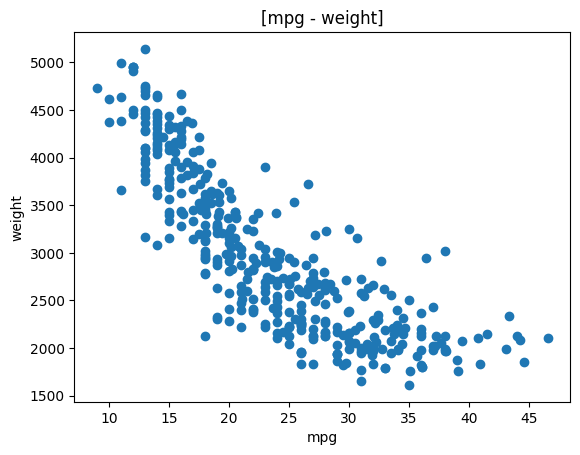

In [46]:
colors = np.random.rand(mpgDF.shape[0])
size = mpgDF['mpg'] * 100

plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('[mpg - weight]')
plt.show()


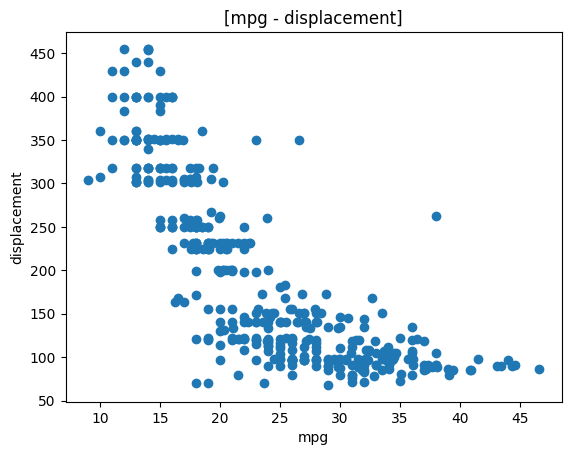

In [47]:
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.title('[mpg - displacement]')
plt.show()


In [48]:
def printscatter(col1, col2):
    """draw scatter graph

    Args:
        sr1 (Serise): Serise 1
        sr2 (Serise): Serise 2
    """
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.title(f'{col1} - {col2} [{round(corrDF[col1][col2], 2)}]')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


In [49]:
def scatterplot(sr1, sr2):
    """draw scatter graph

    Args:
        sr1 (Serise): Serise 1
        sr2 (Serise): Serise 2
    """
    plt.scatter(sr1, sr2)
    plt.title(f'{sr1.name} - {sr2.name} [{round(corrDF[sr1.name][sr2.name], 2)}]')
    plt.xlabel(sr1.name)
    plt.ylabel(sr2.name)
    plt.show()


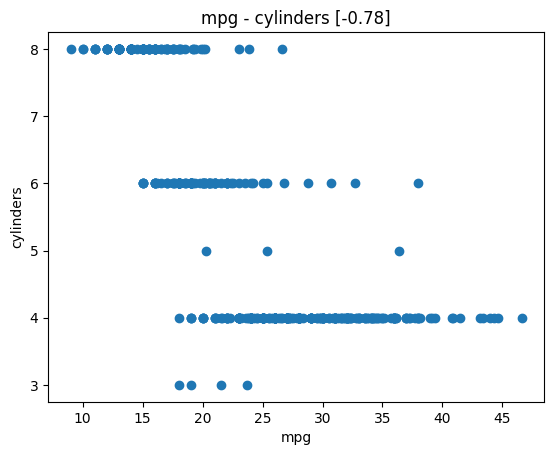

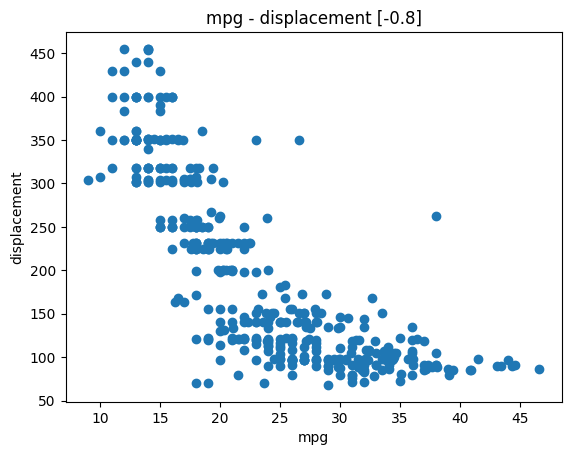

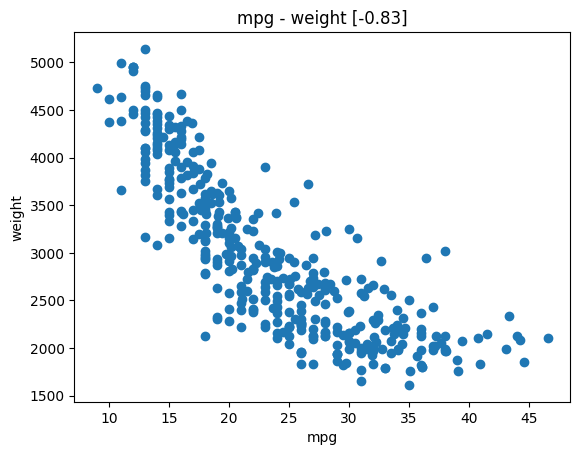

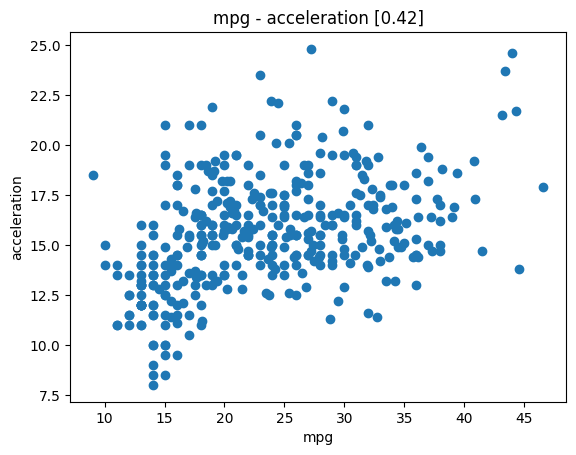

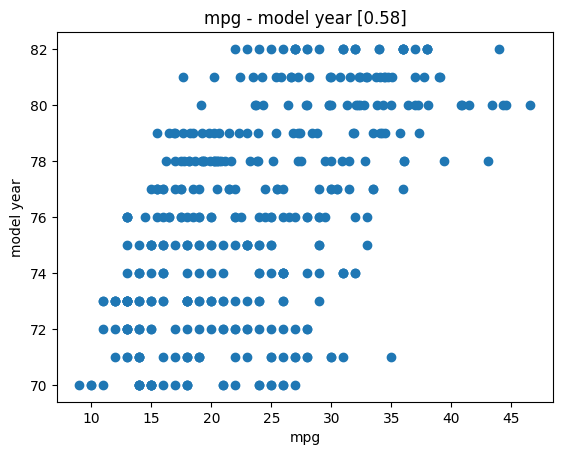

In [50]:
for col in corrDF.columns[1:]:
    printscatter('mpg', col)


(6-2) 자동차 제조사의 데이터 비율

In [60]:
originSR = mpgDF['origin'].value_counts()
originSR.index, originSR.values


(CategoricalIndex(['USA', 'JPN', 'EU'], categories=['USA', 'EU', 'JPN'], ordered=False, dtype='category', name='origin'),
 array([249,  79,  70], dtype=int64))

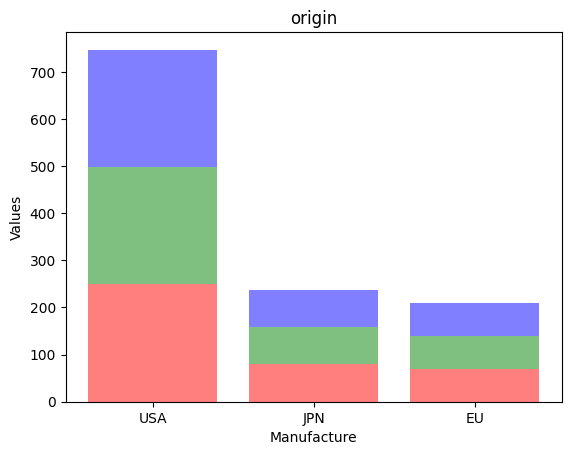

In [79]:
plt.bar(originSR.index, originSR.values, color='r', alpha=0.5)
plt.bar(originSR.index, originSR.values, color='g', alpha=0.5, bottom=originSR.values)
plt.bar(originSR.index, originSR.values, color='b', alpha=0.5, bottom=originSR.values+originSR.values)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('Values')
plt.show()


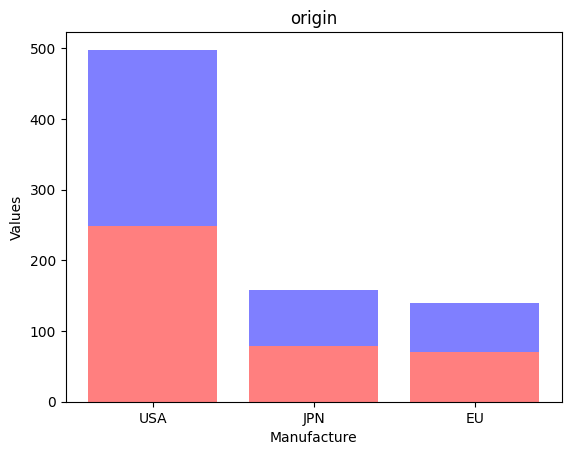

In [ ]:
plt.bar(originSR.index, originSR.values, color='r', alpha=0.5)
plt.bar(originSR.index, originSR.values, color='b', alpha=0.5, bottom=originSR.values)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('Values')
plt.show()


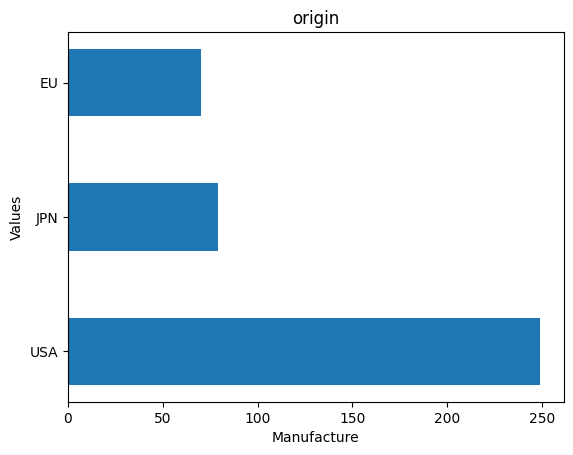

In [67]:
plt.barh(originSR.index, originSR.values, height=0.5)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('Values')
plt.show()


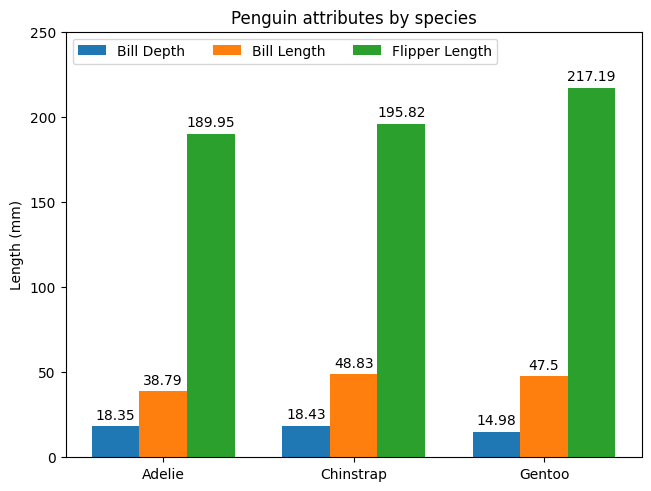

In [71]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()


- 다중 그래프

- 방법 1) fig, ax = plt.subplots()
- 방법 2) subplot(행, 열, 번호)

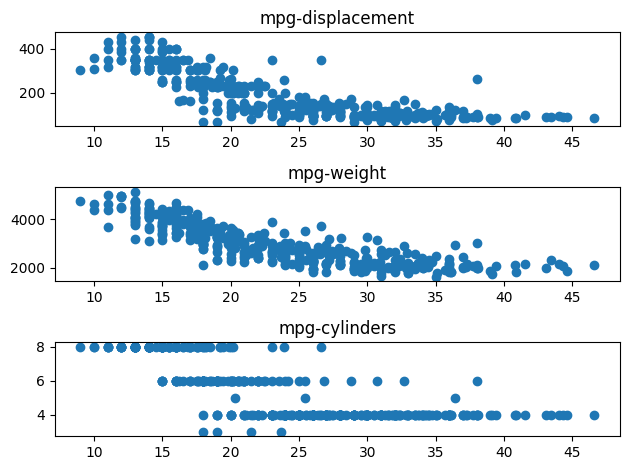

In [81]:
#          행,열,번호
plt.subplot(3, 1, 1)
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title('mpg-displacement')

plt.subplot(3, 1, 2)
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.title('mpg-weight')

plt.subplot(3, 1, 3)
plt.scatter(mpgDF['mpg'], mpgDF['cylinders'])
plt.title('mpg-cylinders')

plt.tight_layout()  # 여러개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()


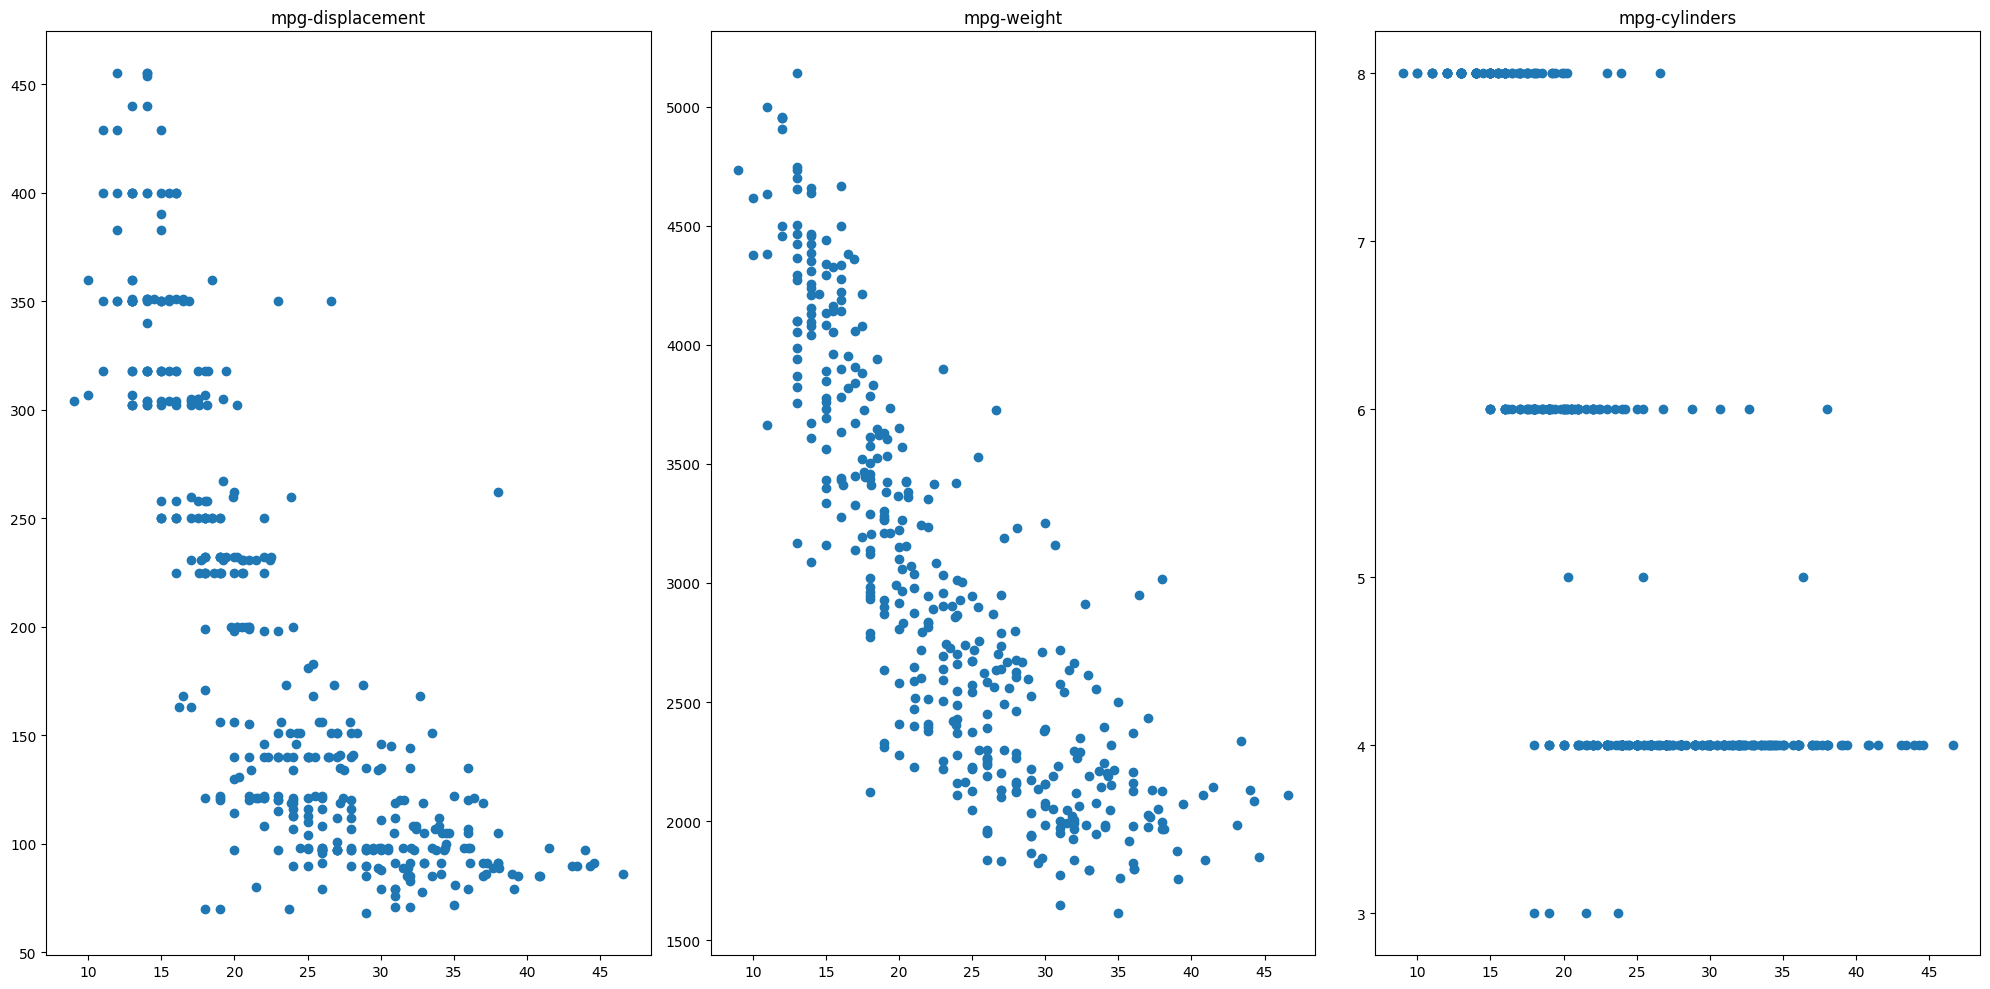

In [88]:
plt.figure(figsize=(20, 10))
#          행,열,번호
plt.subplot(1, 3, 1)
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title('mpg-displacement')

plt.subplot(1, 3, 2)
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.title('mpg-weight')

plt.subplot(1, 3, 3)
plt.scatter(mpgDF['mpg'], mpgDF['cylinders'])
plt.title('mpg-cylinders')

plt.tight_layout()  # 여러개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()


C:\Users\KDP-25\AppData\Local\Temp\ipykernel_832\4251072246.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


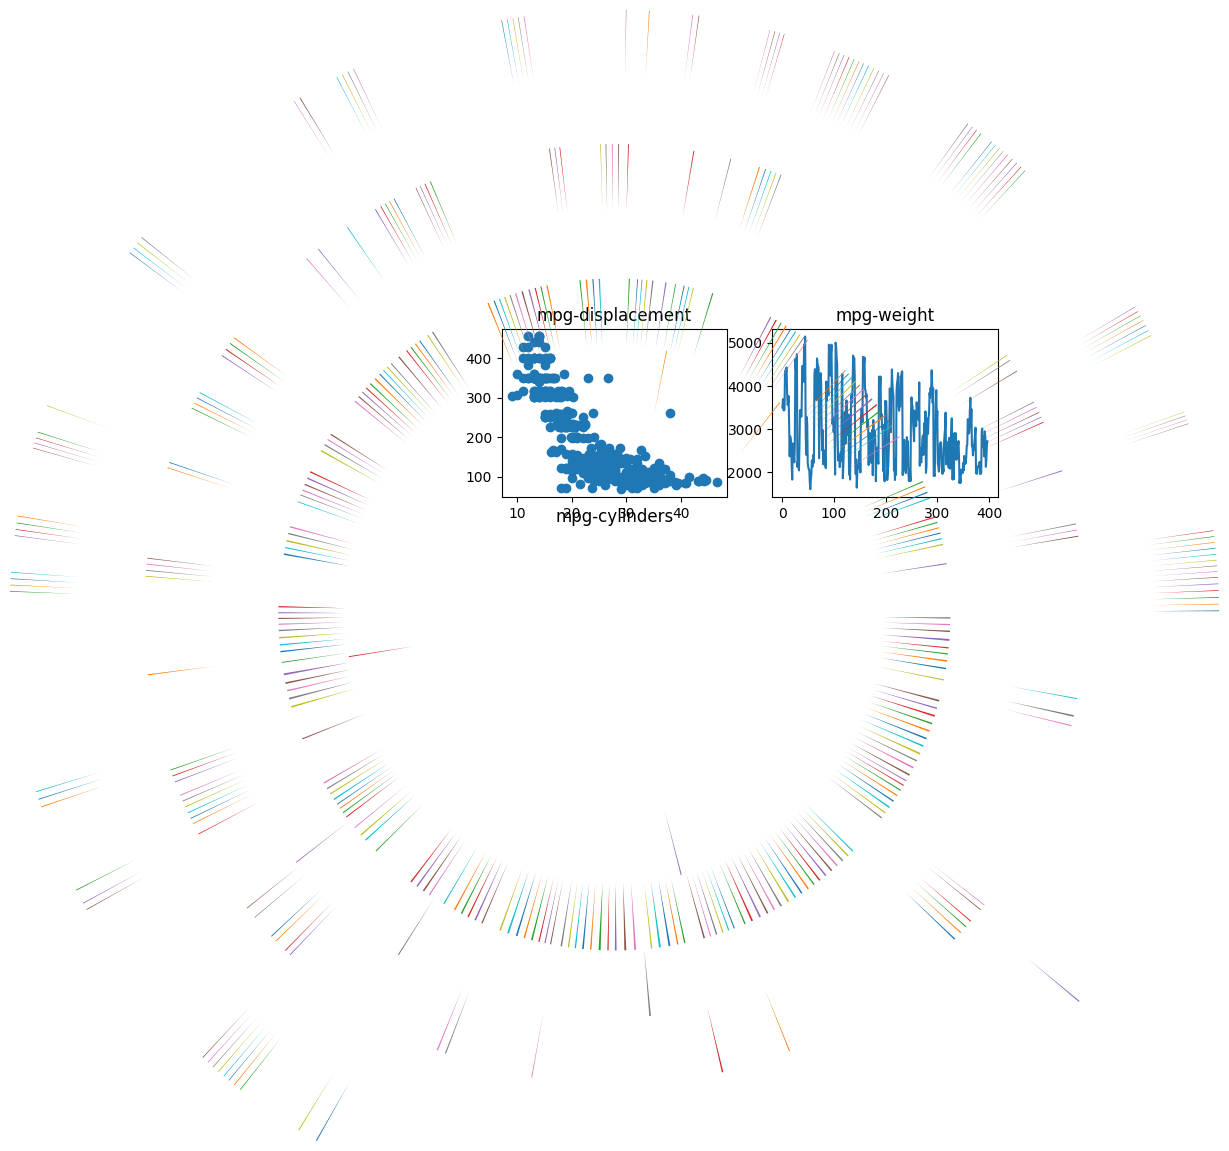

In [114]:
plt.subplot(2, 2, 1)
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title('mpg-displacement')

plt.subplot(2, 2, 2)
plt.plot( mpgDF['weight'])
plt.title('mpg-weight')

plt.subplot(2, 2, 3)
plt.pie(mpgDF['mpg'], mpgDF['cylinders'])
plt.title('mpg-cylinders')

plt.tight_layout()
plt.show()


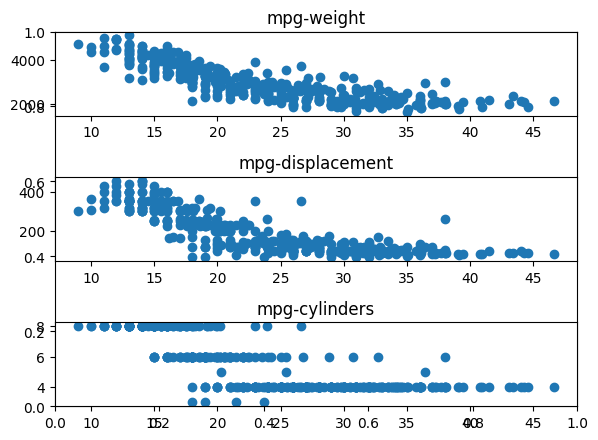

In [95]:
fig, ax = plt.subplots()

ax1 = fig.add_subplot(311)
ax1.scatter(mpgDF['mpg'], mpgDF['weight'])
ax1.set_title('mpg-weight')

ax2 = fig.add_subplot(312)
ax2.scatter(mpgDF['mpg'], mpgDF['displacement'])
ax2.set_title('mpg-displacement')

ax3 = fig.add_subplot(313)
ax3.scatter(mpgDF['mpg'], mpgDF['cylinders'])
ax3.set_title('mpg-cylinders')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Simple plot')

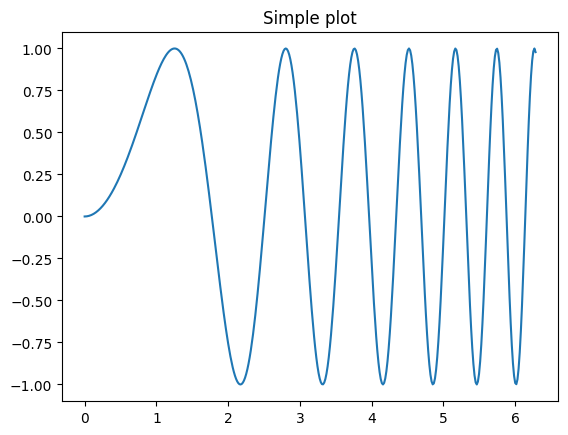

In [96]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


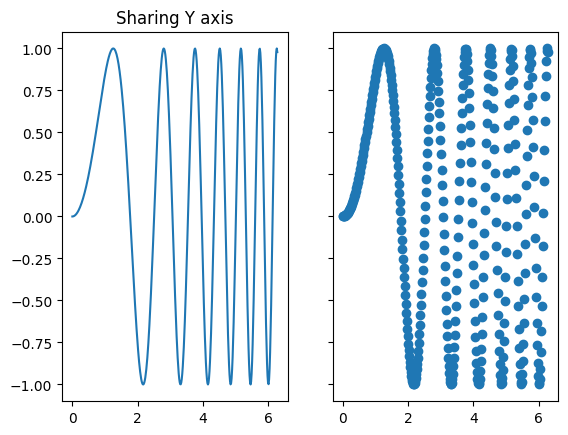

In [97]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)


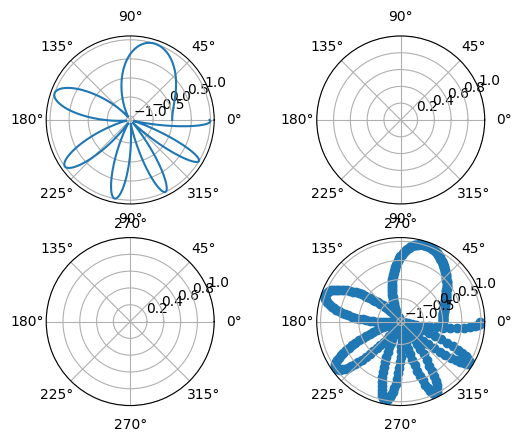

In [104]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

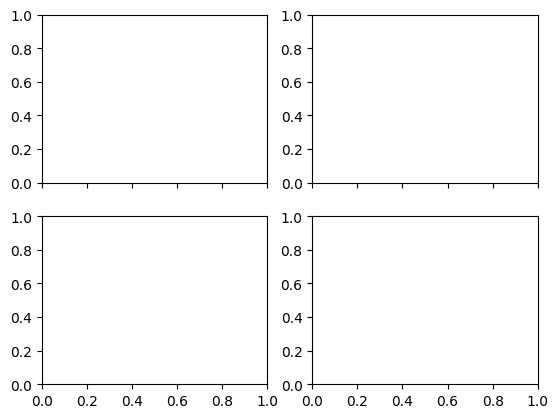

In [106]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

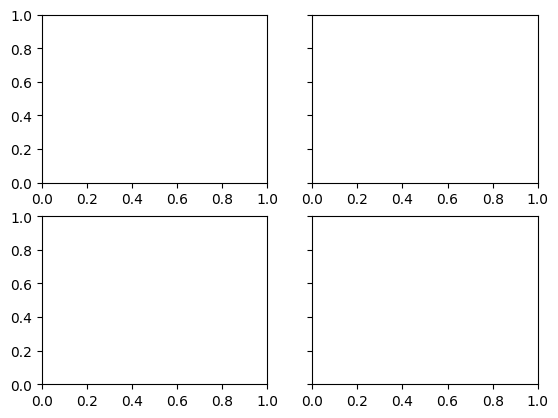

In [107]:
# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

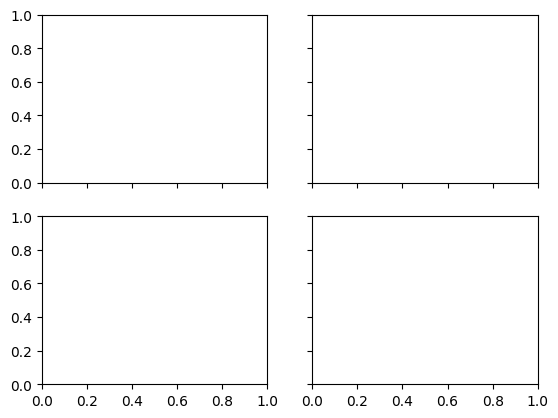

In [108]:
# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

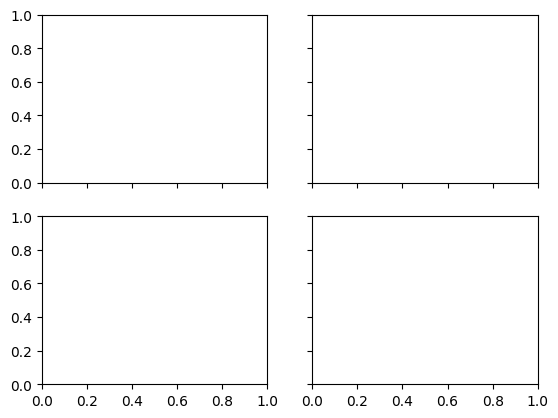

In [109]:
# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)


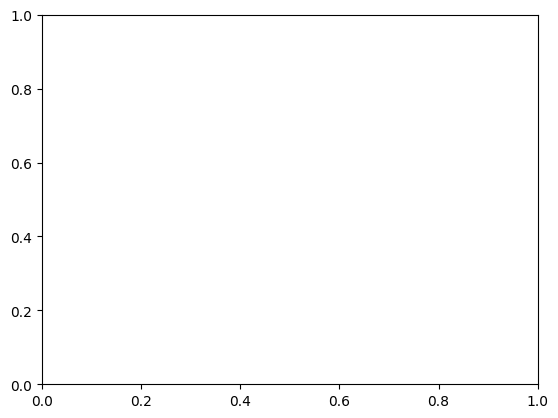

In [110]:
# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)
